# Figures for Stellar Atmospheres Book

This Jupyter Notebook produces the data files for the figures in my [book on Stellar Atmospheres](https://github.com/alanwatsonforster/stellar-atmospheres-book).

To open it in Google Colab, use this link:

https://colab.research.google.com/github/alanwatsonforster/stellar-atmospheres-book/blob/main/figures.ipynb

## Prolog

In [1]:
import math as m
import numpy as np
import scipy as sp
import scipy.integrate as spi
import pandas as pd
import os

We will produce plots in the notebook, but mainly to verify the calculations. The plots in the book will be produced by pgfplot using the TSV data files we write here.

In [2]:
# https://stackoverflow.com/questions/55746749/latex-equations-do-not-render-in-google-colaboratory-when-using-matplotlib

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

We're going to work internaly in SI units. If necessary, we will convert to astronomical units on output.

In [3]:
# SI units
h = 6.62606957e-34
c = 299792458
k = 1.3806503e-23
amu = 1.66053886e-27
m_H = 1.00794*amu
G =  6.673e-11

M_sun = 1.98855e30
R_sun = 696342e3
g_sun = G * M_sun / R_sun**2

a = (8 * m.pi**5 * k**4) / (15.0 * c**3 * h**3)
sigma = a * c / 4

Jy = 1e-26

The Planck function.

In [4]:
def B_nu(nu, T):
    return (2.0 * h * nu**3 / c**2) / np.expm1((h * nu) / (k * T))

def B_lam(lam, T):
    return (2.0 * h * c**2 / lam**5) / np.expm1((h * c) / (k * T * lam))

## Chapter 1

Chapter 1 has no figures that require data.

## Chapter 2

In [5]:
try:
    os.mkdir("chapter-2")
except FileExistsError:
    pass

### Planck Function

(-12.0, -4.0)

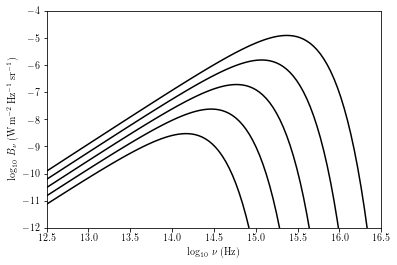

In [6]:
# Work in long double, otherwise we get overflows in the Wien tail
log10_nu = np.linspace(12.5, 16.5, 100, dtype=np.longdouble)
nu = 10.0**log10_nu

log10_B_nu_2500 = np.log10(B_nu(nu,2.5e3))
log10_B_nu_5000 = np.log10(B_nu(nu,5e3))
log10_B_nu_10000 = np.log10(B_nu(nu,10e3))
log10_B_nu_20000 = np.log10(B_nu(nu,20e3))
log10_B_nu_40000 = np.log10(B_nu(nu,40e3))

pd.DataFrame(
    [
        log10_nu, 
        log10_B_nu_2500,
        log10_B_nu_5000,
        log10_B_nu_10000,
        log10_B_nu_20000,
        log10_B_nu_40000
    ]
).transpose().to_csv("chapter-2/B-nu.tsv",index=False,header=False,sep='\t')

plt.plot(log10_nu, log10_B_nu_2500,"k")
plt.plot(log10_nu, log10_B_nu_5000,"k")
plt.plot(log10_nu, log10_B_nu_10000,"k")
plt.plot(log10_nu, log10_B_nu_20000,"k")
plt.plot(log10_nu, log10_B_nu_40000,"k")
plt.xlabel(r"$\log_{10}\,\nu$ $(\mathrm{Hz})$")
plt.ylabel(r"$\log_{10}\,B_\nu$ $\mathrm{(W\,m^{-2}\,Hz^{-1}\,sr^{-1})}$")
plt.xlim(12.5,16.5)
plt.ylim(-12,-4)

(0.0, 15.0)

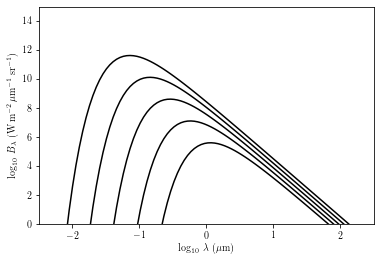

In [7]:
def B_lam_micron(lam_micron, T):
    return 1e-6*B_lam(lam_micron*1e-6,T)

# Work in long double, otherwise we get overflows in the Wien tail
log10_lam_micron = np.linspace(-2.5, 2.5, 100, dtype=np.longdouble)
lam_micron = 10**log10_lam_micron

log10_B_lam_micron_2500 = np.log10(B_lam_micron(lam_micron,2.5e3))
log10_B_lam_micron_5000 = np.log10(B_lam_micron(lam_micron,5e3))
log10_B_lam_micron_10000 = np.log10(B_lam_micron(lam_micron,10e3))
log10_B_lam_micron_20000 = np.log10(B_lam_micron(lam_micron,20e3))
log10_B_lam_micron_40000 = np.log10(B_lam_micron(lam_micron,40e3))

pd.DataFrame(
    [
        log10_lam_micron,
        log10_B_lam_micron_2500,
        log10_B_lam_micron_5000,
        log10_B_lam_micron_10000,
        log10_B_lam_micron_20000,
        log10_B_lam_micron_40000
    ]
).transpose().to_csv("chapter-2/B-lambda.tsv",index=False,header=False,sep='\t')

plt.plot(log10_lam_micron, log10_B_lam_micron_2500,"k")
plt.plot(log10_lam_micron, log10_B_lam_micron_5000,"k")
plt.plot(log10_lam_micron, log10_B_lam_micron_10000,"k")
plt.plot(log10_lam_micron, log10_B_lam_micron_20000,"k")
plt.plot(log10_lam_micron, log10_B_lam_micron_40000,"k")
plt.xlabel(r"$\log_{10}\,\lambda$ $(\mathrm{\mu m})$")
plt.ylabel(r"$\log_{10}\,B_\lambda$ $\mathrm{(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})}$")
plt.xlim(-2.5,+2.5)
plt.ylim(0,15)

(0.0, 1.0)

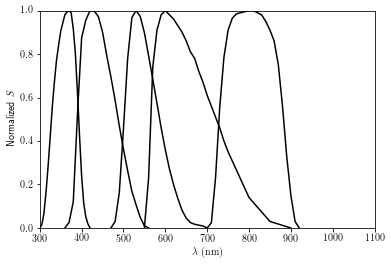

In [8]:
# From Bessell (1990)

U_lam = [300,305,310,315,320,325,330,335,340,345,350,355,360,365,370,375,380,385,390,395,400,405,410,415,420]
U = [0.000,0.016,0.068,0.167,0.287,0.423,0.560,0.673,0.772,0.841,0.905,0.943,0.981,0.993,1.000,0.989,0.916,0.804,0.625,0.423,0.238,0.114,0.051,0.019,0.000]
B_lam = [360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560]
B = [0.000,0.026,0.120,0.523,0.875,0.956,1.000,0.998,0.972,0.901,0.793,0.694,0.587,0.470,0.362,0.263,0.169,0.107,0.049,0.010,0.000]
V_lam = [470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700]
V = [0.000,0.030,0.163,0.458,0.780,0.967,1.000,0.973,0.898,0.792,0.684,0.574,0.461,0.359,0.270,0.197,0.135,0.081,0.045,0.025,0.017,0.013,0.009,0.000]
R_lam = [550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,800,850,900]
R = [0.00,0.23,0.74,0.91,0.98,1.00,0.98,0.96,0.93,0.90,0.86,0.81,0.78,0.72,0.67,0.61,0.56,0.51,0.46,0.40,0.35,0.14,0.03,0.00]
I_lam = [700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920]
I = [0.000,0.024,0.232,0.555,0.785,0.910,0.965,0.985,0.990,0.995,1.000,1.000,0.990,0.980,0.950,0.910,0.860,0.750,0.560,0.330,0.150,0.030,0.000]

pd.DataFrame([ U_lam, U]).transpose().to_csv("chapter-2/Johnson-Cousins-U.tsv",index=False,header=False,sep='\t')
pd.DataFrame([ B_lam, B]).transpose().to_csv("chapter-2/Johnson-Cousins-B.tsv",index=False,header=False,sep='\t')
pd.DataFrame([ V_lam, V]).transpose().to_csv("chapter-2/Johnson-Cousins-V.tsv",index=False,header=False,sep='\t')
pd.DataFrame([ R_lam, R]).transpose().to_csv("chapter-2/Johnson-Cousins-R.tsv",index=False,header=False,sep='\t')
pd.DataFrame([ I_lam, I]).transpose().to_csv("chapter-2/Johnson-Cousins-I.tsv",index=False,header=False,sep='\t')

plt.plot(U_lam, U,"k")
plt.plot(B_lam, B,"k")
plt.plot(V_lam, V,"k")
plt.plot(R_lam, R,"k")
plt.plot(I_lam, I,"k")
plt.ylabel(r"Normalized $S$")
plt.xlabel(r"$\lambda$ $\mathrm{(nm)}$")
plt.xlim(300,1100)
plt.ylim(0,1.0)

(0.0, 1.0)

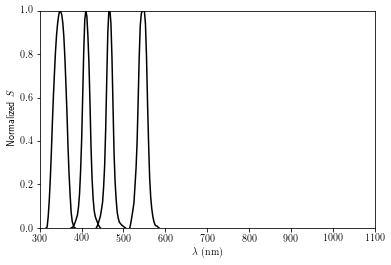

In [9]:
# From Bessell (2011)

u_lam = [315.0, 317.5, 320.0, 322.5, 325.0, 327.5, 330.0, 332.5, 335.0, 337.5, 340.0, 342.5, 345.0, 347.5, 350.0, 352.5, 355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0, 377.5, 380.0, 382.5, 385.0]
u     = [0.000, 0.004, 0.050, 0.122, 0.219, 0.341, 0.479, 0.604, 0.710, 0.809, 0.886, 0.939, 0.976, 1.000, 0.995, 0.981, 0.943, 0.880, 0.782, 0.659, 0.525, 0.370, 0.246, 0.151, 0.071, 0.030, 0.014, 0.000, 0.000]
v_lam = np.array(u_lam) + (375.0 - 315.0)
v     = [0.000, 0.003, 0.006, 0.016, 0.029, 0.044, 0.060, 0.096, 0.157, 0.262, 0.404, 0.605, 0.810, 0.958, 1.000, 0.973, 0.882, 0.755, 0.571, 0.366, 0.224, 0.134, 0.079, 0.053, 0.039, 0.027, 0.014, 0.006, 0.000]
b_lam = np.array(u_lam) + (435.0 - 315.0)
b     = [0.000, 0.010, 0.023, 0.039, 0.056, 0.086, 0.118, 0.188, 0.287, 0.457, 0.681, 0.896, 0.998, 1.000, 0.942, 0.783, 0.558, 0.342, 0.211, 0.130, 0.072, 0.045, 0.027, 0.021, 0.015, 0.011, 0.007, 0.003, 0.000]
y_lam = np.array(u_lam) + (515.0 - 315.0)
y     = [0.000, 0.022, 0.052, 0.082, 0.116, 0.194, 0.274, 0.393, 0.579, 0.782, 0.928, 0.985, 0.999, 1.000, 0.997, 0.938, 0.789, 0.574, 0.388, 0.232, 0.143, 0.090, 0.054, 0.031, 0.016, 0.010, 0.009, 0.004, 0.000]

pd.DataFrame([u_lam, u]).transpose().to_csv("chapter-2/Stroemgren-u.tsv",index=False,header=False,sep='\t')
pd.DataFrame([v_lam, v]).transpose().to_csv("chapter-2/Stroemgren-v.tsv",index=False,header=False,sep='\t')
pd.DataFrame([b_lam, b]).transpose().to_csv("chapter-2/Stroemgren-b.tsv",index=False,header=False,sep='\t')
pd.DataFrame([y_lam, y]).transpose().to_csv("chapter-2/Stroemgren-y.tsv",index=False,header=False,sep='\t')

plt.plot(u_lam, u, "k")
plt.plot(v_lam, v, "k")
plt.plot(b_lam, b, "k")
plt.plot(y_lam, y, "k")

plt.ylabel(r"Normalized $S$")
plt.xlabel(r"$\lambda$ $\mathrm{(nm)}$")
plt.xlim(300,1100)
plt.ylim(0,1.0)

(0.0, 1.0)

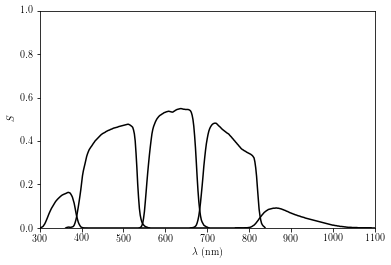

In [10]:
# This is the SDSS 2.5-m system response at 1.3 air masses taken from Doi et al. (2010) http://adsabs.harvard.edu/abs/2010AJ....139.1628D

u_lam = [294,296,298,300,302,304,306,308,310,312,314,316,318,320,322,324,326,328,330,332,334,336,338,340,342,344,346,348,350,352,354,356,358,360,362,364,366,368,370,372,374,376,378,380,382,384,386,388,390,392,394,396,398,400,402,404,406,408,410,412,414,416,762,764,766,768,770,772,774,776,778,780,782,784,786,788,790,792,794]
u = [0.0001,0.0003,0.0005,0.0009,0.0014,0.0029,0.005,0.0077,0.0136,0.0194,0.0276,0.0367,0.046,0.0558,0.0656,0.0743,0.0826,0.0905,0.0969,0.1033,0.1098,0.1162,0.1223,0.1268,0.1314,0.1353,0.139,0.1427,0.146,0.1494,0.1518,0.1537,0.1555,0.157,0.1586,0.1604,0.1625,0.1638,0.1626,0.1614,0.1563,0.1497,0.1416,0.1282,0.1148,0.0956,0.0744,0.0549,0.0407,0.0265,0.0177,0.0107,0.005,0.0032,0.0015,0.0008,0.0005,0.0003,0.0003,0.0003,0.0002,0.0001,0.000003,0.000044,0.000149,0.000258,0.000397,0.000553,0.000676,0.000675,0.000551,0.000403,0.000276,0.000179,0.000093,0.000044,0.000026,0.000011,0.000007]
g_lam = [362,364,366,368,370,372,374,376,378,380,382,384,386,388,390,392,394,396,398,400,402,404,406,408,410,412,414,416,418,420,422,424,426,428,430,432,434,436,438,440,442,444,446,448,450,452,454,456,458,460,462,464,466,468,470,472,474,476,478,480,482,484,486,488,490,492,494,496,498,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562]
g = [0.000,0.002,0.003,0.004,0.004,0.003,0.003,0.004,0.005,0.007,0.012,0.022,0.035,0.051,0.074,0.097,0.122,0.148,0.176,0.208,0.240,0.262,0.279,0.295,0.312,0.329,0.341,0.351,0.360,0.366,0.372,0.377,0.383,0.389,0.394,0.400,0.404,0.408,0.412,0.416,0.420,0.424,0.428,0.431,0.434,0.436,0.438,0.440,0.443,0.445,0.447,0.449,0.450,0.452,0.454,0.455,0.457,0.459,0.460,0.461,0.462,0.463,0.464,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.477,0.475,0.473,0.470,0.467,0.463,0.451,0.433,0.400,0.343,0.277,0.201,0.140,0.090,0.059,0.040,0.027,0.019,0.014,0.010,0.007,0.005,0.004,0.002,0.001,0.000]
r_lam = [538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,582,584,586,588,590,592,594,596,598,600,602,604,606,608,610,612,614,616,618,620,622,624,626,628,630,632,634,636,638,640,642,644,646,648,650,652,654,656,658,660,662,664,666,668,670,672,674,676,678,680,682,684,686,688,690,692,694,696,698,700,702,704]
r = [0.000,0.002,0.005,0.011,0.023,0.045,0.075,0.118,0.164,0.212,0.257,0.298,0.337,0.372,0.404,0.433,0.453,0.467,0.477,0.487,0.495,0.502,0.507,0.512,0.516,0.519,0.521,0.524,0.526,0.529,0.531,0.532,0.534,0.535,0.536,0.537,0.536,0.535,0.534,0.533,0.533,0.536,0.538,0.541,0.543,0.545,0.546,0.547,0.548,0.549,0.549,0.548,0.547,0.546,0.546,0.545,0.545,0.545,0.545,0.544,0.542,0.539,0.532,0.519,0.499,0.468,0.423,0.369,0.303,0.234,0.172,0.121,0.084,0.056,0.037,0.027,0.020,0.013,0.010,0.008,0.005,0.004,0.002,0.000]
i_lam = [660,662,664,666,668,670,672,674,676,678,680,682,684,686,688,690,692,694,696,698,700,702,704,706,708,710,712,714,716,718,720,722,724,726,728,730,732,734,736,738,740,742,744,746,748,750,752,754,756,758,760,762,764,766,768,770,772,774,776,778,780,782,784,786,788,790,792,794,796,798,800,802,804,806,808,810,812,814,816,818,820,822,824,826,828,830,832,834,836,838]
i = [0.000,0.001,0.001,0.002,0.003,0.005,0.008,0.013,0.023,0.037,0.056,0.083,0.116,0.155,0.195,0.238,0.284,0.322,0.357,0.387,0.410,0.430,0.446,0.457,0.465,0.471,0.476,0.479,0.481,0.482,0.482,0.481,0.477,0.473,0.469,0.466,0.462,0.458,0.454,0.451,0.448,0.445,0.442,0.439,0.436,0.434,0.431,0.426,0.422,0.418,0.413,0.409,0.404,0.400,0.395,0.391,0.386,0.382,0.377,0.373,0.368,0.364,0.361,0.359,0.356,0.354,0.352,0.349,0.347,0.345,0.343,0.341,0.339,0.336,0.333,0.328,0.322,0.304,0.276,0.238,0.186,0.136,0.087,0.058,0.036,0.021,0.014,0.009,0.006,0.002]
z_lam = [768,770,772,774,776,778,780,782,784,786,788,790,792,794,796,798,800,802,804,806,808,810,812,814,816,818,820,822,824,826,828,830,832,834,836,838,840,842,844,846,848,850,852,854,856,858,860,862,864,866,868,870,872,874,876,878,880,882,884,886,888,890,892,894,896,898,900,902,904,906,908,910,912,914,916,918,920,922,924,926,928,930,932,934,936,938,940,942,944,946,948,950,952,954,956,958,960,962,964,966,968,970,972,974,976,978,980,982,984,986,988,990,992,994,996,998,1000,1002,1004,1006,1008,1010,1012,1014,1016,1018,1020,1022,1024,1026,1028,1030,1032,1034,1036,1038,1040,1042,1044,1046,1048,1050,1052,1054,1056,1058,1060,1062,1064,1066,1068,1070,1072,1074,1076,1078,1080,1082,1084,1086,1088,1090,1092,1094,1096,1098,1100,1102,1104,1106,1108,1110,1112,1114,1116]
z = [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.001,0.002,0.002,0.003,0.004,0.006,0.008,0.011,0.013,0.017,0.021,0.026,0.031,0.036,0.042,0.047,0.052,0.057,0.062,0.066,0.071,0.074,0.077,0.080,0.082,0.085,0.086,0.087,0.088,0.089,0.090,0.091,0.091,0.091,0.092,0.092,0.091,0.091,0.090,0.089,0.088,0.087,0.085,0.084,0.082,0.081,0.079,0.077,0.076,0.074,0.072,0.070,0.069,0.067,0.066,0.064,0.063,0.061,0.060,0.059,0.057,0.056,0.055,0.054,0.052,0.051,0.050,0.049,0.048,0.046,0.045,0.044,0.043,0.042,0.041,0.040,0.039,0.038,0.037,0.036,0.035,0.034,0.033,0.032,0.031,0.030,0.029,0.028,0.027,0.026,0.025,0.024,0.023,0.022,0.021,0.020,0.019,0.018,0.017,0.016,0.015,0.014,0.013,0.013,0.012,0.011,0.011,0.010,0.009,0.009,0.008,0.007,0.007,0.007,0.006,0.006,0.005,0.005,0.004,0.004,0.003,0.003,0.003,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000]

pd.DataFrame([u_lam, u]).transpose().to_csv("chapter-2/SDSS-u.tsv",index=False,header=False,sep='\t')
pd.DataFrame([g_lam, g]).transpose().to_csv("chapter-2/SDSS-g.tsv",index=False,header=False,sep='\t')
pd.DataFrame([r_lam, r]).transpose().to_csv("chapter-2/SDSS-r.tsv",index=False,header=False,sep='\t')
pd.DataFrame([i_lam, i]).transpose().to_csv("chapter-2/SDSS-i.tsv",index=False,header=False,sep='\t')
pd.DataFrame([z_lam, z]).transpose().to_csv("chapter-2/SDSS-z.tsv",index=False,header=False,sep='\t')

plt.plot(u_lam, u, "k")
plt.plot(g_lam, g, "k")
plt.plot(r_lam, r, "k")
plt.plot(i_lam, i, "k")
plt.plot(z_lam, z, "k")
plt.ylabel(r"$S$")
plt.xlabel(r"$\lambda$ $\mathrm{(nm)}$")
plt.xlim(300,1100)
plt.ylim(0,1.0)

(0.0, 1.0)

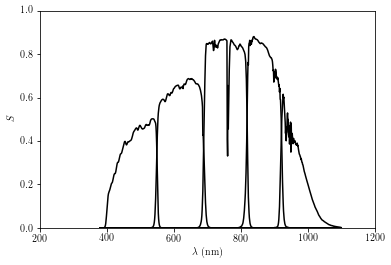

In [11]:
# This is the Pan-STARRS1 system response at 1.2 air masses taken from Tonry et al. (2012) http://adsabs.harvard.edu/abs/2012ApJ...750...99T

g_lam = [380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
g = [0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.001,0.002,0.004,0.007,0.012,0.021,0.035,0.053,0.073,0.096,0.118,0.135,0.147,0.157,0.163,0.167,0.171,0.175,0.181,0.186,0.192,0.199,0.204,0.206,0.208,0.211,0.217,0.225,0.233,0.24,0.246,0.249,0.25,0.25,0.253,0.259,0.268,0.277,0.286,0.295,0.3,0.302,0.302,0.304,0.309,0.316,0.323,0.33,0.336,0.34,0.341,0.342,0.344,0.348,0.354,0.361,0.368,0.374,0.38,0.386,0.392,0.396,0.398,0.398,0.394,0.388,0.384,0.382,0.384,0.388,0.393,0.396,0.396,0.396,0.397,0.397,0.399,0.4,0.401,0.402,0.403,0.405,0.408,0.413,0.418,0.424,0.431,0.437,0.441,0.444,0.446,0.448,0.451,0.453,0.456,0.458,0.46,0.46,0.459,0.455,0.451,0.45,0.453,0.459,0.463,0.467,0.471,0.472,0.471,0.468,0.466,0.463,0.459,0.457,0.456,0.455,0.456,0.456,0.457,0.458,0.459,0.461,0.465,0.469,0.473,0.475,0.476,0.475,0.473,0.472,0.473,0.473,0.474,0.473,0.472,0.474,0.477,0.483,0.489,0.495,0.498,0.5,0.501,0.502,0.502,0.502,0.502,0.502,0.501,0.5,0.496,0.493,0.489,0.486,0.481,0.467,0.438,0.39,0.323,0.248,0.175,0.113,0.068,0.041,0.025,0.015,0.009,0.006,0.003,0.002,0.002,0.001,0.001,0.001,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
r_lam = [380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
r = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.003,0.004,0.005,0.008,0.011,0.017,0.026,0.04,0.062,0.093,0.134,0.184,0.242,0.305,0.367,0.423,0.469,0.504,0.528,0.544,0.556,0.565,0.57,0.575,0.578,0.582,0.584,0.586,0.588,0.59,0.591,0.592,0.592,0.591,0.591,0.589,0.586,0.583,0.581,0.582,0.586,0.592,0.599,0.606,0.612,0.615,0.617,0.617,0.616,0.614,0.611,0.609,0.609,0.61,0.615,0.621,0.623,0.623,0.621,0.621,0.624,0.628,0.633,0.638,0.641,0.642,0.644,0.647,0.649,0.651,0.652,0.653,0.654,0.655,0.655,0.656,0.656,0.657,0.656,0.653,0.648,0.643,0.64,0.64,0.642,0.645,0.648,0.647,0.646,0.646,0.648,0.652,0.641,0.655,0.657,0.662,0.662,0.66,0.66,0.66,0.663,0.668,0.673,0.678,0.681,0.684,0.685,0.686,0.687,0.686,0.685,0.684,0.683,0.683,0.685,0.686,0.684,0.686,0.687,0.684,0.684,0.682,0.682,0.681,0.679,0.677,0.675,0.672,0.669,0.666,0.664,0.663,0.663,0.663,0.663,0.662,0.662,0.66,0.658,0.655,0.652,0.649,0.644,0.639,0.633,0.626,0.617,0.608,0.595,0.579,0.556,0.427,0.428,0.391,0.346,0.305,0.255,0.204,0.156,0.116,0.084,0.06,0.042,0.029,0.021,0.015,0.011,0.008,0.006,0.005,0.004,0.003,0.002,0.002,0.001,0.001,0.001,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
i_lam = [380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
i = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.003,0.004,0.005,0.007,0.009,0.012,0.016,0.022,0.029,0.039,0.056,0.084,0.133,0.169,0.264,0.35,0.426,0.512,0.591,0.67,0.737,0.792,0.821,0.843,0.848,0.846,0.848,0.847,0.847,0.845,0.848,0.849,0.852,0.853,0.851,0.849,0.847,0.847,0.849,0.852,0.855,0.857,0.859,0.844,0.833,0.816,0.825,0.842,0.863,0.846,0.833,0.833,0.842,0.835,0.833,0.831,0.838,0.828,0.838,0.846,0.85,0.853,0.857,0.86,0.864,0.864,0.865,0.865,0.866,0.865,0.865,0.865,0.865,0.865,0.865,0.867,0.868,0.868,0.869,0.868,0.868,0.867,0.866,0.864,0.863,0.86,0.408,0.331,0.655,0.456,0.562,0.64,0.73,0.783,0.833,0.845,0.859,0.865,0.865,0.863,0.86,0.858,0.855,0.853,0.851,0.848,0.844,0.842,0.841,0.84,0.838,0.836,0.833,0.83,0.828,0.824,0.82,0.822,0.824,0.827,0.834,0.838,0.838,0.843,0.846,0.844,0.841,0.838,0.835,0.834,0.832,0.83,0.828,0.824,0.821,0.817,0.813,0.81,0.804,0.798,0.78,0.767,0.728,0.684,0.609,0.523,0.408,0.313,0.221,0.142,0.104,0.071,0.047,0.033,0.021,0.015,0.01,0.007,0.005,0.004,0.003,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
z_lam = [380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
z = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.012,0.015,0.019,0.025,0.034,0.045,0.06,0.079,0.101,0.129,0.16,0.203,0.252,0.318,0.397,0.499,0.588,0.696,0.761,0.75,0.833,0.849,0.85,0.863,0.839,0.86,0.858,0.857,0.845,0.862,0.857,0.867,0.867,0.877,0.879,0.88,0.88,0.876,0.873,0.871,0.869,0.869,0.868,0.868,0.867,0.866,0.865,0.863,0.861,0.858,0.855,0.854,0.852,0.85,0.848,0.848,0.849,0.85,0.851,0.85,0.849,0.849,0.848,0.846,0.845,0.843,0.84,0.839,0.837,0.835,0.833,0.832,0.831,0.829,0.827,0.824,0.82,0.816,0.81,0.806,0.801,0.796,0.792,0.79,0.787,0.786,0.783,0.783,0.781,0.777,0.773,0.764,0.747,0.723,0.727,0.671,0.719,0.697,0.71,0.691,0.73,0.725,0.714,0.687,0.688,0.694,0.683,0.691,0.68,0.666,0.653,0.659,0.625,0.642,0.592,0.59,0.549,0.504,0.429,0.361,0.283,0.214,0.158,0.116,0.079,0.057,0.039,0.028,0.019,0.014,0.01,0.008,0.006,0.005,0.004,0.004,0.004,0.003,0.002,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_lam = [380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.003,0.003,0.003,0.005,0.006,0.009,0.015,0.024,0.04,0.066,0.098,0.152,0.199,0.271,0.335,0.403,0.451,0.506,0.539,0.565,0.591,0.615,0.597,0.601,0.57,0.543,0.501,0.486,0.435,0.464,0.401,0.435,0.441,0.513,0.529,0.498,0.499,0.431,0.419,0.471,0.386,0.459,0.404,0.487,0.349,0.48,0.386,0.422,0.435,0.413,0.402,0.388,0.412,0.395,0.401,0.401,0.394,0.399,0.386,0.387,0.382,0.381,0.388,0.39,0.378,0.38,0.368,0.358,0.349,0.341,0.337,0.335,0.327,0.326,0.315,0.318,0.311,0.302,0.301,0.292,0.29,0.282,0.274,0.268,0.26,0.255,0.25,0.243,0.238,0.232,0.227,0.221,0.216,0.211,0.205,0.2,0.195,0.189,0.183,0.178,0.173,0.168,0.162,0.157,0.152,0.147,0.141,0.136,0.131,0.127,0.124,0.12,0.116,0.111,0.106,0.102,0.097,0.094,0.091,0.088,0.084,0.081,0.078,0.075,0.071,0.067,0.064,0.06,0.057,0.055,0.053,0.05,0.048,0.045,0.043,0.041,0.039,0.037,0.036,0.035,0.034,0.033,0.032,0.03,0.029,0.028,0.027,0.026,0.025,0.024,0.023,0.022,0.021,0.02,0.019,0.018,0.017,0.016,0.015,0.015,0.014,0.014,0.013,0.012,0.012,0.011,0.011,0.011,0.01,0.01,0.009,0.009,0.008,0.008,0.008,0.007,0.007,0.007,0.006,0.006,0.006,0.006,0.005,0.005,0.005,0.005,0.004,0.004,0.004,0.004,0.003,0.003,0.003,0.003,0.002]

pd.DataFrame([g_lam, g]).transpose().to_csv("chapter-2/Pan-STARRS-g.tsv",index=False,header=False,sep='\t')
pd.DataFrame([r_lam, r]).transpose().to_csv("chapter-2/Pan-STARRS-r.tsv",index=False,header=False,sep='\t')
pd.DataFrame([i_lam, i]).transpose().to_csv("chapter-2/Pan-STARRS-i.tsv",index=False,header=False,sep='\t')
pd.DataFrame([z_lam, z]).transpose().to_csv("chapter-2/Pan-STARRS-z.tsv",index=False,header=False,sep='\t')
pd.DataFrame([y_lam, y]).transpose().to_csv("chapter-2/Pan-STARRS-y.tsv",index=False,header=False,sep='\t')

plt.plot(g_lam, g, "k")
plt.plot(r_lam, r, "k")
plt.plot(i_lam, i, "k")
plt.plot(z_lam, z, "k")
plt.plot(y_lam, y, "k")
plt.ylabel(r"$S$")
plt.xlabel(r"$\lambda$ $\mathrm{(nm)}$")
plt.xlim(200,1200)
plt.ylim(0,1.0)

In [12]:
!tar -czf chapter-2.tar.gz chapter-2

## Chapter 3

Chapter 3 has no figures that require data.

## Chapter 4

Chapter 4 has no figures that require data.

## Chapter 5

In [13]:
try:
    os.mkdir("chapter-5")
except FileExistsError:
    pass

In [14]:
### Grey Atmosphere

In [15]:
def integral(f, a, b):
    return spi.quad_vec(f, a, b, epsabs=1e-6, epsrel=1e-5)[0]

def Hopf_Z(u):
    return (1.0 - 0.5 * u * np.log((1.0 + u) / (1.0 - u)))**2 + (0.5 * np.pi * u)**2
    
def Hopf_H(u):
    return np.exp(integral(lambda theta: theta * np.arctan(u * np.tan(theta)) / (1.0 - theta / np.tan(theta)), 
                        0, 0.5 * m.pi) / m.pi) / np.sqrt(1.0 + u)

q_infinity = integral(lambda u: Hopf_H(u) * u**2, 0.0, 1.0) / integral(lambda u: Hopf_H(u) * u, 0.0, 1.0)

def q_by_integration(tau):
    return q_infinity - integral(lambda u: np.exp(-tau / u) / Hopf_H(u) / Hopf_Z(u), 0.0, 1.0) / 2 / np.sqrt(3)

# Calculating q by direct integration is too slow when we need to
# calculate, for example J_\nu and H_\nu. So, we will interpolate.

from scipy import interpolate

tau_grid = np.linspace(0.0, 10.0, 1000)
q_grid = q_by_integration(tau_grid)
q_by_interpolation = interpolate.CubicSpline(tau_grid, q_grid)
def q(tau):
    if tau > 10.0:
        return q_infinity
    else:
        return q_by_interpolation(tau)
q = np.vectorize(q)

def q_eddington(tau):
    return 2.0 / 3.0
q_eddington = np.vectorize(q_eddington)

# Normalized surrogates

def theta(tau):
    return (0.75 * (tau + q(tau)))**0.25

def B_alpha_hat(alpha, theta):
    if alpha == 0.0:
        return 0.0
    else:
        return (15.0 * alpha**3) / (m.pi**4 * theta**4) / m.expm1(alpha / theta)
B_alpha_hat = np.vectorize(B_alpha_hat)

def J_alpha_hat(alpha, tau):
    E_1 = lambda x: sp.special.exp1(x)
    if alpha == 0.0:
        return 0.0
    elif tau == 0:
        return (15.0 * alpha**3) / (2.0 * m.pi**4 * theta(tau)**4) * (
            integral(lambda t: E_1(t - tau) / m.expm1(alpha / theta(t)), 0.0, np.inf)
        )
    else:
        return (15.0 * alpha**3) / (2.0 * m.pi**4 * theta(tau)**4) * (
            integral(lambda t: E_1(t - tau) / m.expm1(alpha / theta(t)), tau, np.inf) +
            integral(lambda t: E_1(tau - t) / m.expm1(alpha / theta(t)), 0.0, tau)
        )
J_alpha_hat = np.vectorize(J_alpha_hat)

def S_alpha_hat(alpha, tau):
    return B_alpha_hat(alpha, theta(tau))

def H_alpha_hat(alpha, tau):
    E_2 = lambda x: sp.special.expn(2, x)
    if alpha == 0.0:
        return 0.0
    else:
        return (30.0 * alpha**3) / m.pi**4 * (
            integral(lambda t: E_2(t - tau) / m.expm1(alpha / theta(t)), tau, np.inf) -
            integral(lambda t: E_2(tau - t) / m.expm1(alpha / theta(t)), 0.0, tau)
        )
H_alpha_hat = np.vectorize(H_alpha_hat)

def H_nu(nu, Teff):
    alpha = (h * nu) / (k * Teff)
    H = sigma * Teff**4 / (4 * m.pi)
    return H * H_alpha_hat(alpha, 0)

def color_grey(nu0, nu1,Teff):
    return -2.5 * np.log10((H_nu(nu0, Teff) / H_nu(nu0, 10e3)) / (H_nu(nu1, Teff) / H_nu(nu1, 10e3)))
color_grey = np.vectorize(color_grey)

0.7104460895998481
0.5773502691642165


(0.5, 0.8)

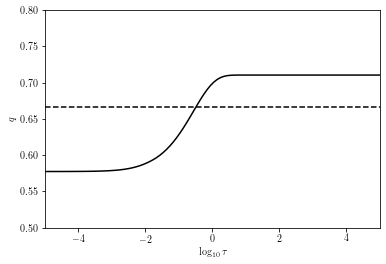

In [16]:
# q

print(q_infinity)
print(q(0))

log10_tau_data = np.linspace(-5.0, 5.0, 100)
tau_data = 10**log10_tau_data
q_eddington_data = q_eddington(tau_data)
q_exact_data = q(tau_data)

pd.DataFrame(
    [
        log10_tau_data, q_eddington_data, q_exact_data
    ]
).transpose().to_csv("chapter-5/grey-q.tsv",index=False,header=False,sep='\t')

plt.plot(log10_tau_data, q_eddington_data, "--k")
plt.plot(log10_tau_data, q_exact_data, "k")
plt.xlabel(r"$\log_{10} \tau$")
plt.ylabel(r"$q$")
plt.xlim(-5,5)
plt.ylim(0.5,0.8)

(0.0, 1.0)

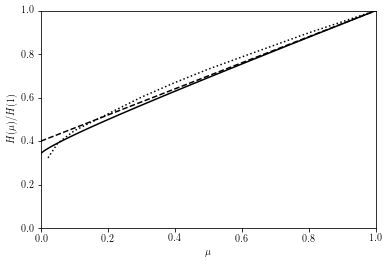

In [17]:
# Limb darkening

mu = np.linspace(0.0, 1.0, 100)

limb_darkening_eddington = (2 + 3 * mu) / 5.0
limb_darkening_exact = Hopf_H(mu) / Hopf_H(1)

pd.DataFrame(
    [
        mu, 
        limb_darkening_eddington,
        limb_darkening_exact
    ]
).transpose().to_csv("chapter-5/grey-limb-darkening.tsv",index=False,header=False,sep='\t')

mu_solar             = [1.0 , 0.8  , 0.6  , 0.5  , 0.4  , 0.3  , 0.2  , 0.1  , 0.05, 0.02]
limb_darkening_solar = [1.00, 0.898, 0.787, 0.731, 0.669, 0.602, 0.525, 0.448, 0.39, 0.32]

pd.DataFrame(
    [
        mu_solar,
        limb_darkening_solar    
    ]
).transpose().to_csv("chapter-5/solar-limb-darkening.tsv",index=False,header=False,sep='\t')

plt.plot(mu, limb_darkening_eddington,"--k")
plt.plot(mu, limb_darkening_exact,"k")
plt.plot(mu_solar, limb_darkening_solar,":k")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$H(\mu) / H(1)$")
plt.xlim(0,1)
plt.ylim(0,1)

(0.6, 1.4)

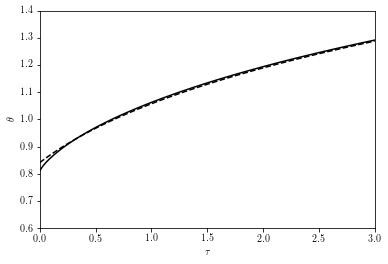

In [18]:
# Temperature

tau = np.linspace(0.0, 3.0, 100)
theta_eddington = (0.75 * (tau + q_eddington(tau)))**0.25
theta_exact = (0.75 * (tau + q(tau)))**0.25

pd.DataFrame(
    [
        tau,
        theta_eddington,
        theta_exact
    ]
).transpose().to_csv("chapter-5/grey-temperature.tsv",index=False,header=False,sep='\t')

plt.plot(tau, theta_eddington,"--k")
plt.plot(tau, theta_exact,"k")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\theta$")
plt.xlim(0,3)
plt.ylim(0.6,1.4)

(0.0, 0.3)

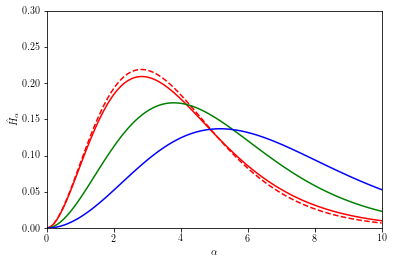

In [19]:
# Normalized flux

alpha = np.linspace(0.0, 10.0, 100)

B_alpha_hat_1 = B_alpha_hat(alpha, 1.0)
H_alpha_hat_0 = H_alpha_hat(alpha, 0.0)
H_alpha_hat_1 = H_alpha_hat(alpha, 1.0)
H_alpha_hat_4 = H_alpha_hat(alpha, 4.0)

pd.DataFrame(
    [
        alpha,
        B_alpha_hat_1,
        H_alpha_hat_0,
        H_alpha_hat_1,
        H_alpha_hat_4
    ]
).transpose().to_csv("chapter-5/grey-flux.tsv",index=False,header=False,sep='\t')

plt.plot(alpha, B_alpha_hat_1,"--r")
plt.plot(alpha, H_alpha_hat_0,"r")
plt.plot(alpha, H_alpha_hat_1,"g")
plt.plot(alpha, H_alpha_hat_4,"b")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\hat H_\alpha$")
plt.xlim(0,10)
plt.ylim(0.0,0.3)

(0.0, 0.3)

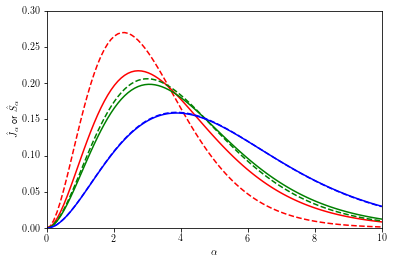

In [20]:
# Normalized heating and cooling

alpha = np.linspace(0.0, 10.0, 100)

S_alpha_hat_0 = S_alpha_hat(alpha, 0.0)
J_alpha_hat_0 = J_alpha_hat(alpha, 0.0)
S_alpha_hat_1 = S_alpha_hat(alpha, 1.0)
J_alpha_hat_1 = J_alpha_hat(alpha, 1.0)
S_alpha_hat_4 = S_alpha_hat(alpha, 4.0)
J_alpha_hat_4 = J_alpha_hat(alpha, 4.0)

pd.DataFrame(
    [
        alpha,
        J_alpha_hat_0,
        S_alpha_hat_0,
        J_alpha_hat_1,
        S_alpha_hat_1,
        J_alpha_hat_4,
        S_alpha_hat_4
    ]
).transpose().to_csv("chapter-5/grey-heating-and-cooling.tsv",index=False,header=False,sep='\t')

plt.plot(alpha, J_alpha_hat_0,"r")
plt.plot(alpha, S_alpha_hat_0,"--r")
plt.plot(alpha, J_alpha_hat_1,"g")
plt.plot(alpha, S_alpha_hat_1,"--g")
plt.plot(alpha, J_alpha_hat_4,"b")
plt.plot(alpha, S_alpha_hat_4,"--b")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\hat J_\alpha$ or $\hat S_\alpha$")
plt.xlim(0,10)
plt.ylim(0.0,0.3)

(-1.0, 2.0)

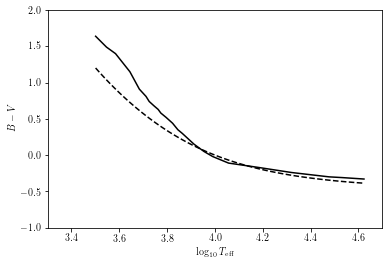

In [21]:
Teff_obs = [
    42000, 34000, 30000, 20900, 15200, 11400, 9790, 9000,
    8180, 7300, 7000, 6650, 6250, 5940, 5790, 5560, 5310, 5150, 4830, 4410,
    3840, 3520, 3170
]
log10_Teff_obs = np.log10(Teff_obs)

B_V_obs = [
    -0.33, -0.31, -0.30, -0.24, -0.17, -0.11, -0.02, +0.05, +0.15,
    +0.30, +0.35, +0.44, +0.52, +0.58, +0.63, +0.68, +0.74, +0.81, +0.91,
    +1.15, +1.40, +1.49, +1.64
]

nu_B = c / 0.445e-6
nu_V = c / 0.551e-6

log10_Teff_grey = np.linspace(log10_Teff_obs.min(), log10_Teff_obs.max(), 100)
Teff_grey = 10**log10_Teff_grey
B_V_grey = color_grey(nu_B, nu_V, Teff_grey)

pd.DataFrame(
    [
        log10_Teff_obs,
        B_V_obs
    ]
).transpose().to_csv("chapter-5/observed-B-V.tsv",index=False,header=False,sep='\t')
pd.DataFrame(
    [
        log10_Teff_grey,
        B_V_grey
    ]
).transpose().to_csv("chapter-5/grey-B-V.tsv",index=False,header=False,sep='\t')

plt.plot(log10_Teff_obs, B_V_obs,"k")
plt.plot(log10_Teff_grey, B_V_grey,"--k")
plt.xlabel(r"$\log_{10} T_\mathrm{eff}$")
plt.ylabel(r"$B-V$")
plt.xlim(3.3,4.7)
plt.ylim(-1.0,+2.0)

(-1.5, 1.5)

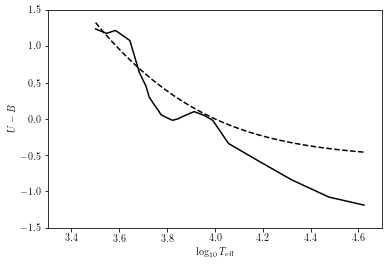

In [22]:
Teff_obs = [
    42000, 34000, 30000, 20900, 15200, 11400, 9790, 9000,
    8180, 7300, 7000, 6650, 6250, 5940, 5790, 5560, 5310, 5150, 4830, 4410,
    3840, 3520, 3170
]
log10_Teff_obs = np.log10(Teff_obs)

U_B_obs = [
    -1.19, -1.12, -1.08, -0.84, -0.58, -0.34,
    -0.02, +0.05, +0.10, +0.03, +0.00, -0.02, +0.02, +0.06, +0.12, +0.20,
    +0.30, +0.45, +0.64, +1.08, +1.22, +1.18, +1.24
]

nu_U = c / 0.365e-6
nu_B = c / 0.445e-6

log10_Teff_grey = np.linspace(log10_Teff_obs.min(), log10_Teff_obs.max(), 100)
Teff_grey = 10**log10_Teff_grey
U_B_grey = color_grey(nu_U, nu_B, Teff_grey)

pd.DataFrame(
    [
        log10_Teff_obs,
        U_B_obs
    ]
).transpose().to_csv("chapter-5/observed-U-B.tsv",index=False,header=False,sep='\t')
pd.DataFrame(
    [
        log10_Teff_grey,
        U_B_grey
    ]
).transpose().to_csv("chapter-5/grey-U-B.tsv",index=False,header=False,sep='\t')

plt.plot(log10_Teff_obs, U_B_obs,"k")
plt.plot(log10_Teff_grey, U_B_grey,"--k")
plt.xlabel(r"$\log_{10} T_\mathrm{eff}$")
plt.ylabel(r"$U-B$")
plt.xlim(3.3,4.7)
plt.ylim(-1.5,+1.5)

In [23]:
!tar -czf chapter-5.tar.gz chapter-5

## Chapter 6


In [24]:
try:
    os.mkdir("chapter-6")
except FileExistsError:
    pass

### Pressure scale height in the Sun.

In [25]:
# mu for neutral gas with solar composition
mu = 1.25
k * 5800 / (mu * m_H * g_sun) / 1e3

139.86385331955222

In [26]:
### Grey Atmosphere

(0.0, 3.0)

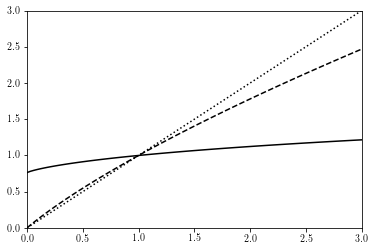

In [27]:
tau = np.linspace(0,3,100)

T_rel = theta(tau) / theta(1.0)
rho_rel = tau / T_rel

pd.DataFrame(
    [
        tau,
        T_rel,
        rho_rel
    ]
).transpose().to_csv("chapter-6/grey-density.tsv",index=False,header=False,sep='\t')

plt.plot(tau, T_rel, "k")
plt.plot(tau, tau, ":k")
plt.plot(tau, rho_rel, "--k")
plt.xlim(0,3)
plt.ylim(0,3)

In [28]:
!tar -czf chapter-6.tar.gz chapter-6

## Problem Set 5

In [29]:
try:
    os.mkdir("problems-5")
except FileExistsError:
    pass

### Vega Flux

We take the Teff = 10e3 K and log g = 4.0 model from https://wwwuser.oats.inaf.it/castelli/grids/gridp00k0odfnew/fp00k0tab.html.

Text(0, 0.5, 'Flux density (Jy)')

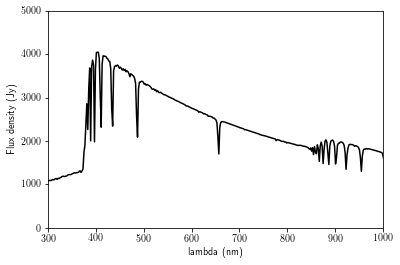

In [39]:
!test -f fp00t10000g40k0odfnew.dat || wget https://wwwuser.oats.inaf.it/castelli/grids/gridp00k0odfnew/fp00t10000g40k0odfnew.dat
df = pd.read_csv('fp00t10000g40k0odfnew.dat', sep='\s+', skiprows=2, skipfooter=1, names=['a', 'b', 'c', 'd', 'e', 'f', 'g'], engine='python')

w = df['c'] * 1e-9
nu = df['d']
Hnu = df['e'] * 1e-7 * 1e4
Fnu = 4 * m.pi * Hnu 

Fnu_earth = Fnu * ((2.8332e-3 / 2 * m.pi / 180 / 60 / 60) ** 2)

mask = (w > 200e-9) & (w < 1100e-9)
pd.DataFrame(
    [
        w[mask] / 1e-9,
        Fnu_earth[mask] / Jy
    ]
).transpose().to_csv("problems-5/vega.tsv",index=False,header=False,sep='\t')

plt.plot(w[mask] / 1e-9, Fnu_earth[mask] / Jy, "k")
plt.xlim(300,1000)
plt.ylim(0,5e3)
plt.xlabel('lambda (nm)')
plt.ylabel('Flux density (Jy)')

In [40]:
!tar -czf problems-5.tar.gz problems-5